In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import cm
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from IPython.display import clear_output

from scipy.signal import savgol_filter

plt.rcParams['figure.figsize']=[18,12]

%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from matplotlib.dates import date2num


plt.rcParams['figure.figsize']=[18,12]

%config InlineBackend.figure_format = 'retina'

In [106]:
df = pd.read_csv('Distribution.csv')

In [107]:
df

,Id,area,CR_Emergence,EVI_Emergence,CR_Harvest,EVI_Harvest,area_hv,Unnamed: 7,Unnamed: 8,Transplant,Harvest
0,1,NW,73,74,138.0,129.0,NW,NaN,DOY,70.0,131.0
1,2,NW,76,76,134.0,132.0,NW,NaN,Date,43900.0,43961.0
2,3,NW,74,69,137.0,131.0,NW,NaN,NaN,NaN,NaN
3,4,NW,89,80,142.0,136.0,NW,NaN,NaN,NaN,NaN
4,5,NW,74,73,138.0,130.0,NW,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
134,136,WZ,79,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,137,WZ,75,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,138,WZ,84,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,139,WZ,77,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
zones = df['area'].unique()
data_by_zone = []


for zone in zones:
    data = df[df['area'] == zone]['CR_Emergence']
    data_by_zone.append(data)
    
    
zones_hv = df['area_hv'].unique()
data_by_zone_hv = []


for zone_hv in zones_hv:
    data = df[df['area_hv'] == zone_hv]['CR_Harvest']
    data_by_zone_hv.append(data)
    
    


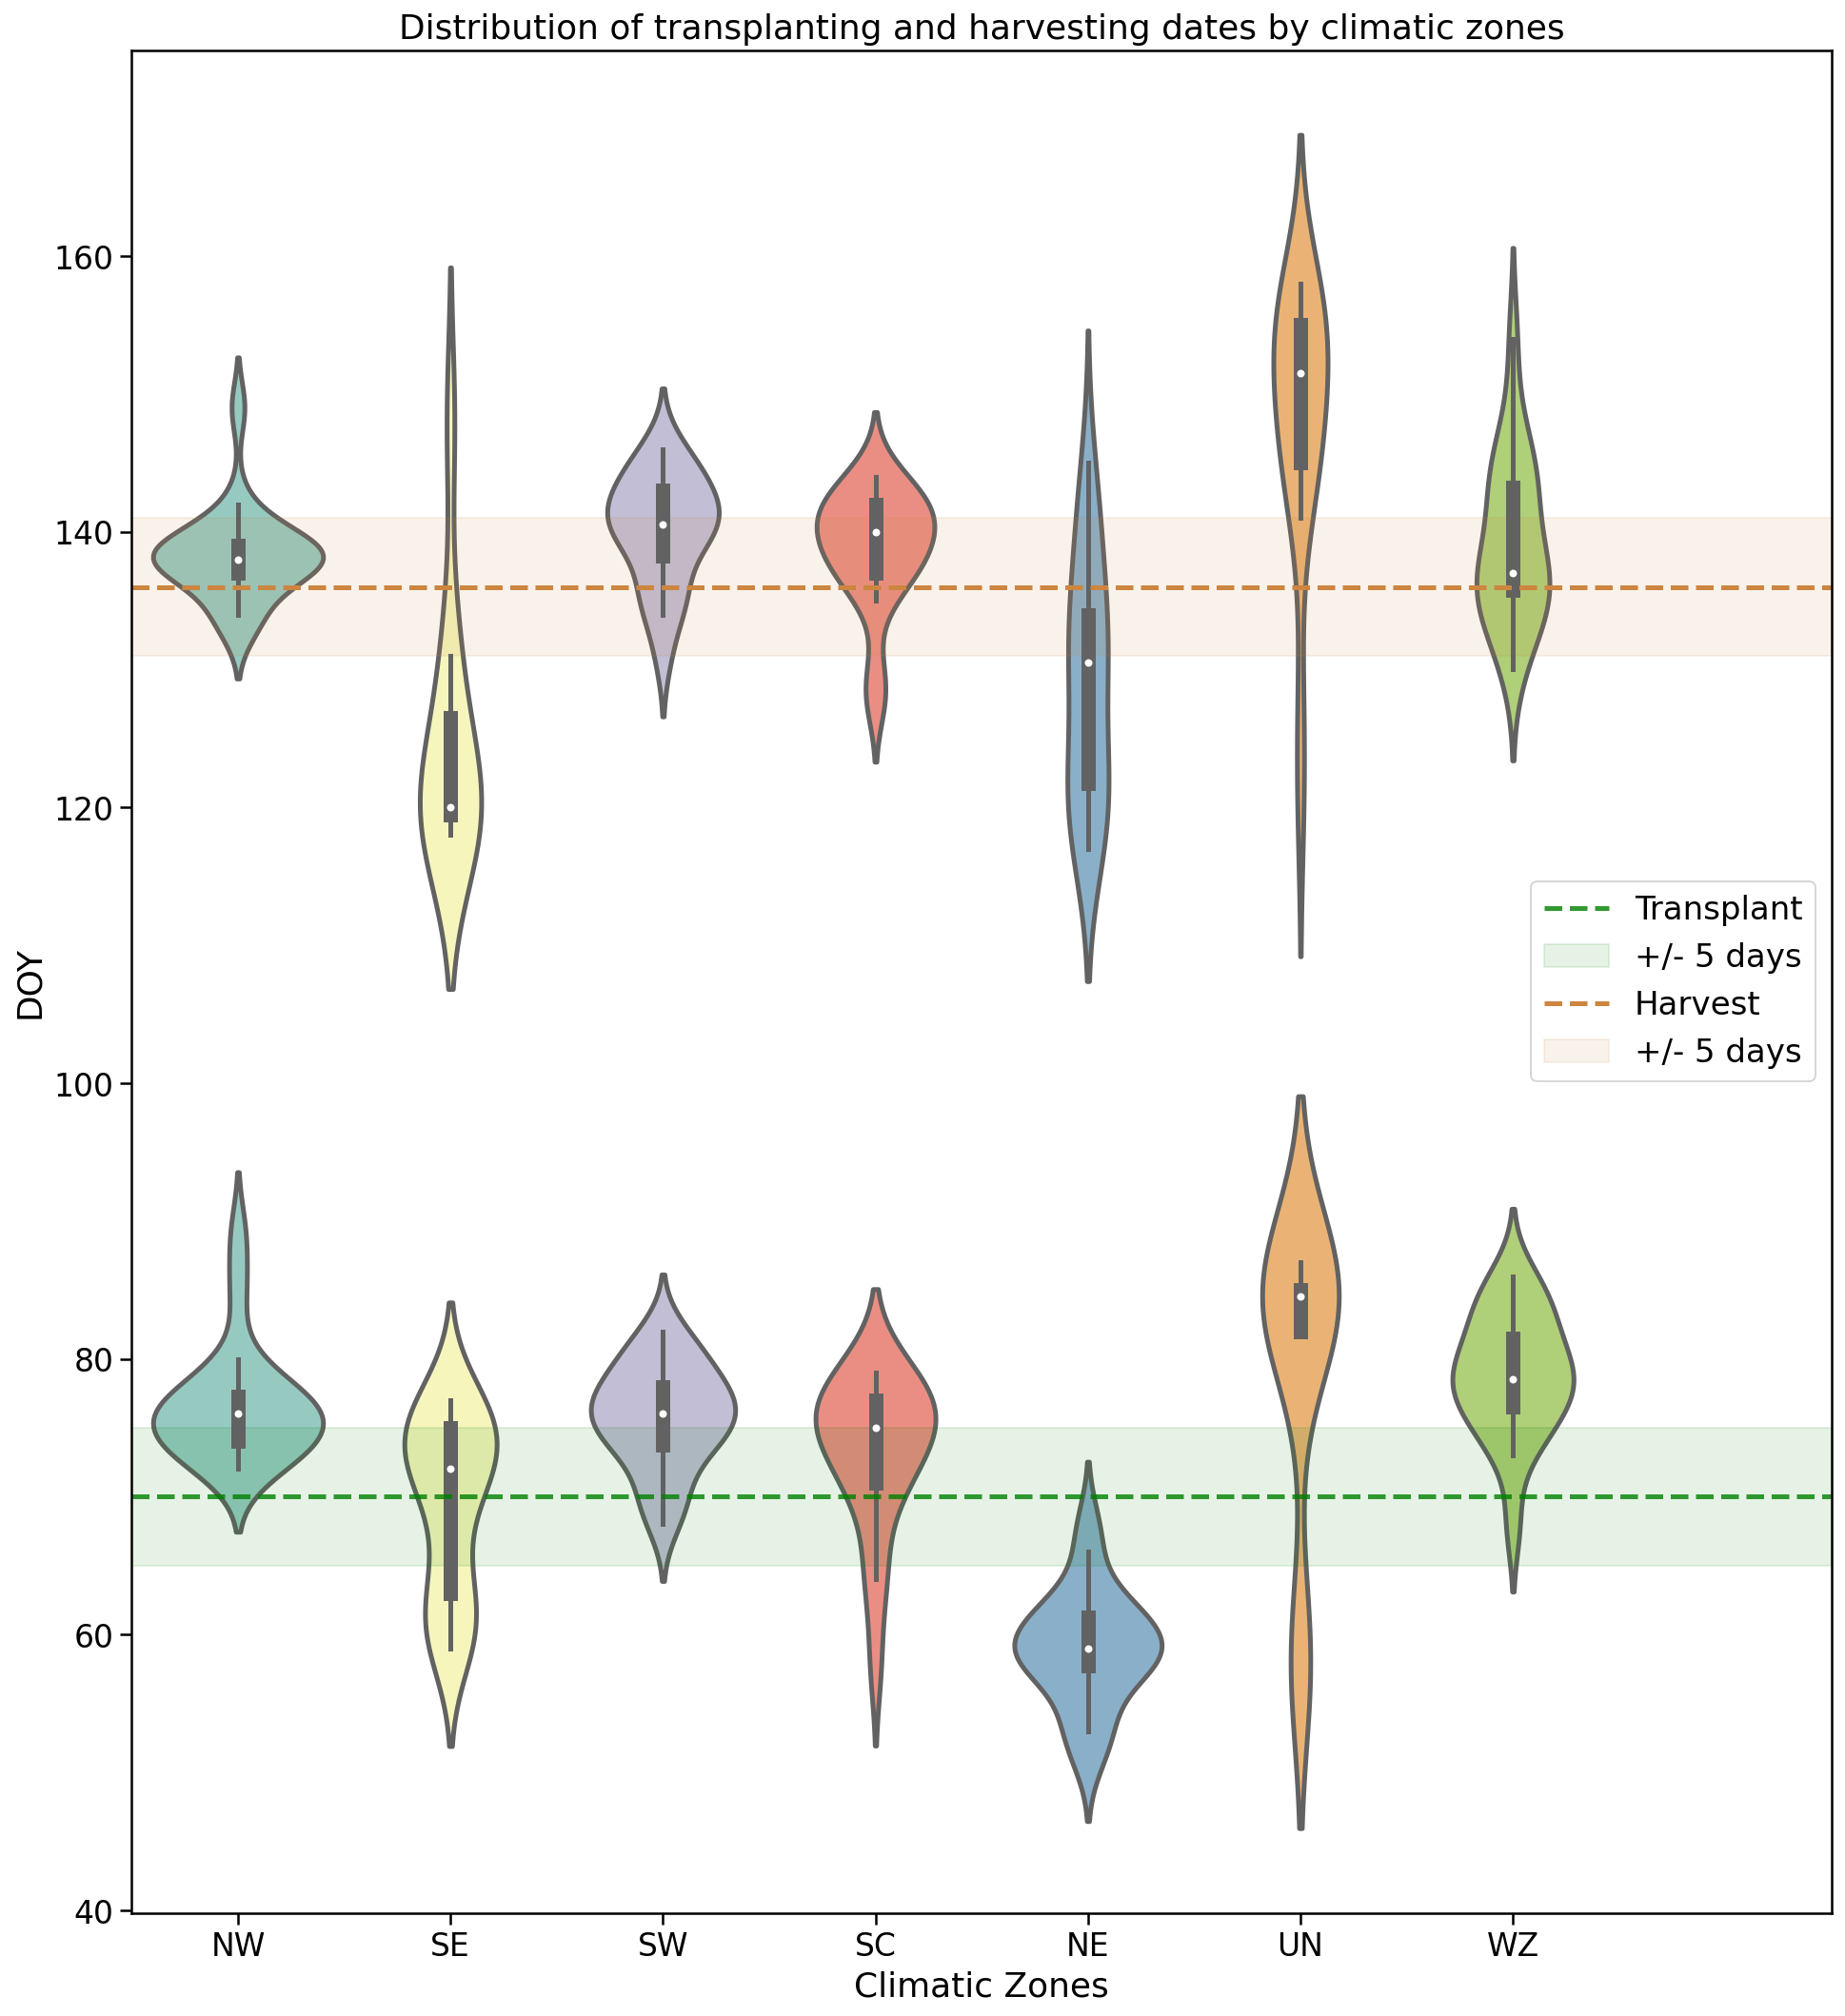

In [109]:

# Create a violin plot
plt.figure(figsize=(16, 18))
sns.violinplot(data=data_by_zone, palette="Set3")
sns.violinplot(data=data_by_zone_hv, palette="Set3")
plt.xlabel('Climatic Zones')
plt.ylabel('DOY')
plt.title('Distribution of transplanting and harvesting dates by climatic zones')
plt.xticks(range(len(zones)), zones)
#plt.ylim (-1, 5.5)

plt.axhline(70, color='green', alpha=0.8, linewidth=2.5, linestyle='--', label= "Transplant")
plt.axhspan(65,75, label="+/- 5 days",color="green", alpha=0.1)

plt.axhline(136, color='peru', alpha=1, linewidth=2.5, linestyle='--', label= "Harvest")
plt.axhspan(131,141, label="+/- 5 days",color="peru", alpha=0.1)


plt.legend(loc = 'center right', frameon = True, prop={'size': 17})

# Show the plot
plt.show()

In [103]:
print(sns.color_palette("Set3").as_hex())

['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']


In [ ]:
#8dd3c7 = NW
#ffffb3 = SE
#bebada = SW
#fb8072 = SC
#80b1d3 = NE
#fdb462 = UN
#b3de69 = WZ